**Cleaning Data Using NLTK**

Part 1 - Pre Processing and EDA


Loading the tweets dataset

In [3]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_colwidth',200)

In [4]:
tweets= pd.read_csv(r'/content/drive/MyDrive/Twitter_Sentiments_Analysis_Using_LLM/Dataset/tweets.csv')
tweets.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [5]:
tweets.shape

(7920, 3)

In [7]:
#### 0 is positiv sentiments and 1 is negative sentiments
#### Lets map 0 as 1 and 1 as 0
tweets['label'] = tweets['label'].map({0:1,1:0})
tweets.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


## Basic Exploratory Data Analysis

In [9]:
# Checking the missing values
tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [10]:
# Dropping the id column as its not important
tweets.drop('id',axis=1, inplace=True)
tweets.head()

label  \
0      0   
1      0   
2      0   
3      0   
4      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [11]:
tweets['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [12]:
# Checking for the class balance
tweets['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: xlabel='label', ylabel='count'>

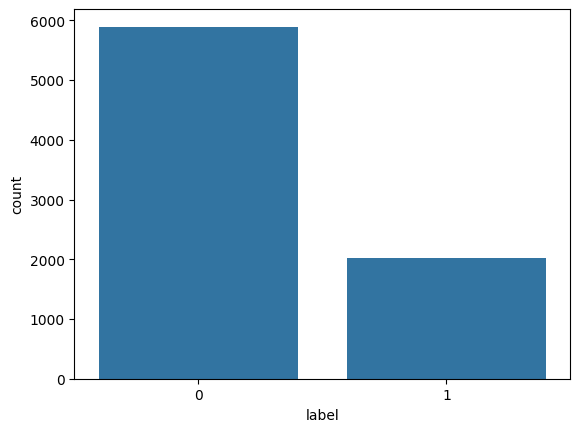

In [13]:
import seaborn as sns
sns.countplot(data=tweets, x='label')

## Data Cleaning

In [14]:
tweets['tweet'][24], tweets['tweet'][14]

("It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/",
 '@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.')

In [15]:
# Regular expression
import re

In [16]:
re.sub(r"'s\b"," is",tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [17]:
tweets['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [18]:
# Removing the user mentioned
re.sub("@[A-Za-z0-9]+","",tweets['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [19]:
tweets['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [20]:
# Removing hastags
re.sub(r'#',"",tweets['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [21]:
# Removing hastags
re.sub(r'http\S+|#|',"",tweets['tweet'][0])

'fingerprint Pregnancy Test  android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [22]:
tweets['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [23]:
# retaining only alphabets (get rid of punct, specila character, digits)
re.sub(r"[^a-zA-Z]",' ',tweets['tweet'][25])

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

# Natural Language Toolkit(nltk)

In [24]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [25]:
#Stopwords remmoval
import nltk
from nltk.corpus import stopwords
nltk_stopwords= set(stopwords.words('english'))
print(nltk_stopwords,"/n")

{"haven't", "he'll", 'under', 'he', 'had', 'no', 'ma', 'she', "they'd", 'to', 'your', 'being', 'an', "it'd", "needn't", 'theirs', 'on', "shouldn't", 'against', 'didn', "that'll", 'that', 'these', 'between', "i'll", 'we', 'his', 'of', 'through', "she'd", 'then', 'there', 'which', 'some', "they're", 'o', 'hers', 'how', 'so', 'aren', 'above', 'her', 'should', 'don', 'each', "shan't", "mustn't", 'have', "he'd", 'over', 'same', 'herself', "didn't", "don't", 'y', 'again', 'once', 'for', 'own', 'its', "it's", "you'll", "doesn't", 'weren', 'couldn', 'both', 'hadn', "i've", 'd', "it'll", 'yourself', 'all', 'in', 'this', 'itself', "they'll", 'needn', 'wouldn', 'until', 'their', 'if', 'such', 'doesn', 'they', 'as', "you've", 'at', "hadn't", 'm', 'were', 'yours', 'when', "should've", 'been', 'the', 'you', 'himself', 'having', 'will', 'what', 'out', "weren't", 'did', 'wasn', 'only', 'few', 'who', 'can', "she's", 'further', "i'm", 'my', 'up', "they've", 'whom', "you're", 'below', 'than', 'by', 'ours

In [26]:
len(nltk_stopwords)

198

In [27]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords= set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'amongst', 'either', 'find', 'under', 'anything', 'had', 'must', 'no', 'to', 'onto', 'being', 'amount', 'fifteen', 'an', 'upon', 'thick', 'between', 'of', 'through', 'then', 'several', 'which', 'some', 'top', 'hence', 'de', 'so', 'please', 'becomes', 'her', 'should', 'behind', 'third', 'each', 'two', 'have', 'co', 'cant', 'therein', 'give', 'whole', 'over', 'nothing', 'same', 'herself', 'otherwise', 'indeed', 'again', 'once', 'whither', 'across', 'beyond', 'herein', 'part', 'eleven', 'also', 'both', 'beforehand', 'whereupon', 'mine', 'anyone', 'rather', 'until', 'their', 'such', 'much', 'ltd', 'back', 'hundred', 'thin', 'as', 'became', 'elsewhere', 'at', 'full', 'yours', 'when', 'the', 'whoever', 'will', 'last', 'anyhow', 'call', 'might', 'out', 'whereafter', 'serious', 'few', 'others', 'describe', 'fire', 'nowhere', 'never', 'can', 'hereafter', 'always', 'except', 'almost', 'my', 'up', 'although', 'whom', 'below', 'whenever', 'often', 'too', 'system', 'one', 'take', 'everyone', 'ever

In [28]:
len(sklearn_stopwords)

318

In [29]:
print(sklearn_stopwords.intersection(nltk_stopwords))

{'under', 'he', 'had', 'no', 'she', 'to', 'your', 'being', 'an', 'on', 'against', 'that', 'these', 'between', 'we', 'his', 'of', 'through', 'then', 'there', 'which', 'some', 'hers', 'how', 'so', 'above', 'her', 'should', 'each', 'have', 'over', 'same', 'herself', 'again', 'once', 'for', 'own', 'its', 'both', 'yourself', 'all', 'in', 'this', 'itself', 'until', 'their', 'if', 'such', 'they', 'as', 'at', 'were', 'yours', 'when', 'been', 'the', 'you', 'himself', 'will', 'what', 'out', 'only', 'few', 'who', 'can', 'further', 'my', 'up', 'whom', 'below', 'than', 'by', 'ourselves', 'too', 'but', 'more', 'while', 'where', 'myself', 'now', 'our', 'because', 'into', 'from', 'why', 'a', 'is', 'or', 'are', 'any', 'during', 'here', 'be', 'with', 'do', 'and', 'nor', 'ours', 'about', 're', 'most', 'down', 'him', 'off', 'after', 'before', 'themselves', 'has', 'it', 'yourselves', 'not', 'am', 'those', 'other', 'i', 'me', 'very', 'was', 'them'}


In [30]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [31]:
#Combining the stopwords from nltk and sklearn
combined_stopwords= sklearn_stopwords.union(nltk_stopwords)

In [32]:
198-119

79

In [33]:
318+79

397

In [34]:
len(combined_stopwords)

397

# Text Normalization - Stemming or Lemmatization

In essence:

Stemming:
Chopping off suffixes and prefixes without considering context or validity.

Lemmatization:
Reducing words to their base form by using a dictionary and considering context to ensure the resulting word is valid.

In [35]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('dogs')

'dog'

In [36]:
tweets['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [37]:
tweets['tweet'][63].split(sep=" ")

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [38]:
new_sent=''
for token in tweets['tweet'][63].split(sep=" "):
  new_sent=new_sent + lemmatizer.lemmatize(token.lower()) + ' '
new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [39]:
#ain't - am not , are not, is not, has not , have not
#cause - because
#gonna - going to
#gotta - got have to
#i'd've - i would i would have
#mightn't've - might not have
#o'clock - of the clock

# Contractions

In [40]:
!pip install contractions

In [41]:
import contractions

In [42]:
contractions.fix("I'm bored")

'I am bored'

In [43]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [44]:
contractions.fix(tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

# Defining a cleaner function to handle all types of problem at one go -

In [45]:
def tweet_cleaner(raw_tweet):
  """This function cleans the raw tweet """
  # substituting contractions
  cleaned_tweet = contractions.fix(raw_tweet)
  #removing the user mentioned in tweets
  cleaned_tweet=re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
  #removeing hastags
  cleaned_tweet = re.sub("#","",cleaned_tweet)
  #removing hyperlinks
  cleaned_tweet = re.sub(r"http\S+","",cleaned_tweet)
  # Remove punctuation and special characters
  cleaned_tweet = re.sub(r"[^\w\s]", "", cleaned_tweet)
  # retaining only alphabets (get rid of punctuations, special characters , digits)
  cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
  cleaned_tweet = cleaned_tweet.lower().strip()
  cleaned_tweet = [token for token in cleaned_tweet.split(sep=" ") if len(token)>2]
  new_sent=""
  for token in cleaned_tweet:
    new_sent=new_sent + lemmatizer.lemmatize(token)+" "
  return new_sent.strip()

In [46]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [47]:
tweet_cleaner(tweets['tweet'][24])

'time for new wallpaper phone wallpaper wall screen galaxy samsung app'

In [48]:
tweets['cleaned_tweets']=tweets['tweet'].apply(tweet_cleaner)

In [49]:
tweets.head()

label  \
0      0   
1      0   
2      0   
3      0   
4      1   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect  
3                                                wired know george wa made that way iphone cute daventry home  
4  what amazing service apple will not even talk about question have unless pay them for their stupid support

In [50]:
tweets.tail()

label  \
7915      0   
7916      0   
7917      0   
7918      0   
7919      0   

                                                                                                                                       tweet  \
7915                             Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/   
7916  We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…   
7917       Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!   
7918   Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/   
7919       Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/   

                                                                                                   cleaned_tweets  
7915                                              live out loud lol liveoutloud selfie smile sony music headphone  
7916         would like wish you amazing day make every minute count tl today iphone accessory news life february  
7917  helping lovely year old neighbor with her ipad this morning ha just made realise that not actually need pad  
7918                         finally got smart pocket wifi stay connected anytimeanywhere ipad and samsung gadget  
7919                             apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew

Data Visualization

In [51]:
# Create a python list of all the words from all the tweets
vocab_raw=[]
for tweet in tweets['tweet']:
  vocab_raw.extend(tweet.split())
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

In [52]:
len(vocab_raw)

133400

In [53]:
vocab_raw = [token for tweet in tweets['tweet'] for token in tweet.split()]
print(len(vocab_raw))

133400


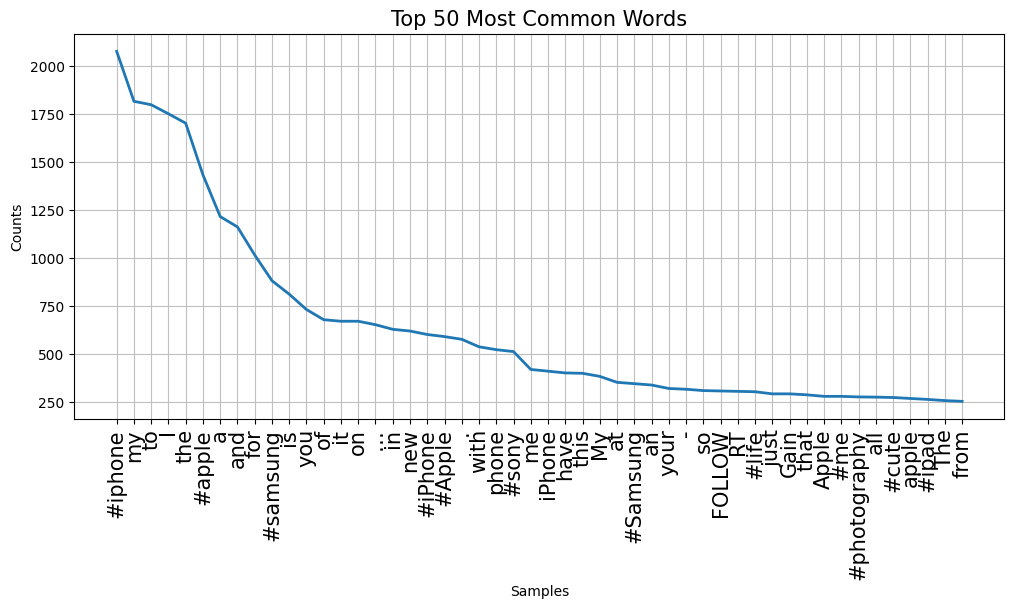

In [54]:
import matplotlib.pyplot as plt
# Frequency distribution of the words in tweets cleaned
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [55]:
freq_dist

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

Freq Distrubition Plot for cleaned tweets

In [56]:
vocab_raw=[token for tweet in tweets['cleaned_tweets'] for token in tweet.split()]
print(vocab_raw)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'this', 'would', 'you', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'wa', 'made', 'that', 'way', 'iphone', 'cute', 'daventry', 'home', 'what', 'amazing', 'service', 'apple', 'will', 'not', 'even', 'talk', 'about', 'question', 'have', 'unless', 'pay', 'them', 'for', 'their', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'for', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pict

In [57]:
len(vocab_raw)

103605

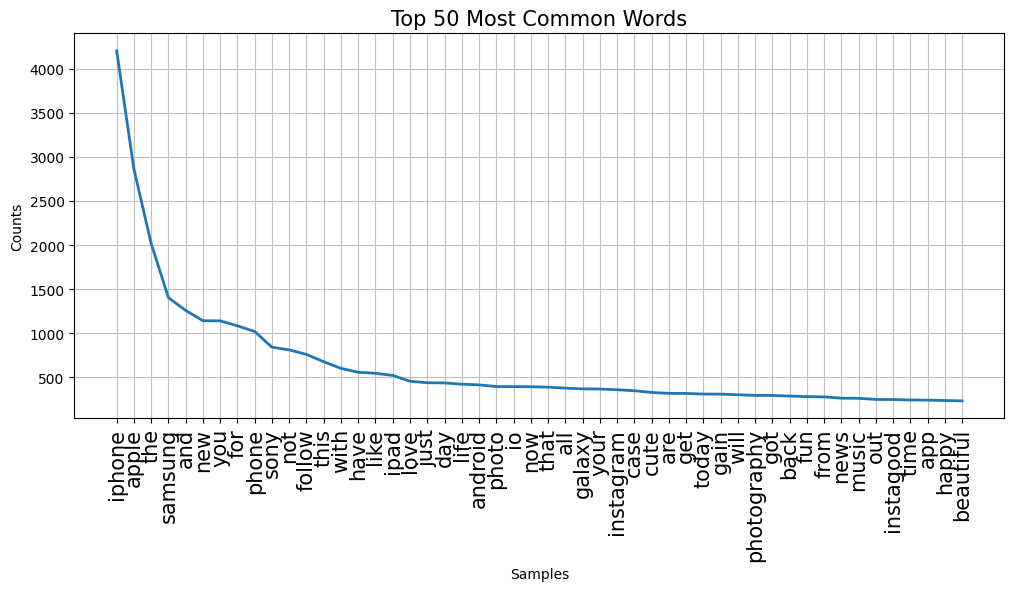

In [58]:
import matplotlib.pyplot as plt
# Frequency distribution of the words in tweets cleaned
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [59]:
freq_dist

FreqDist({'iphone': 4200, 'apple': 2860, 'the': 2016, 'samsung': 1404, 'and': 1259, 'new': 1143, 'you': 1141, 'for': 1085, 'phone': 1020, 'sony': 843, ...})

In [60]:
combined_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 

Freq Dist plot for cleaned tweets , after removing stop words

In [61]:
domain_stopwords= {'twitter','com','io','iO','IO','i0','instagram','facebook','rt'}
domain_stopwords

{'IO', 'com', 'facebook', 'i0', 'iO', 'instagram', 'io', 'rt', 'twitter'}

In [62]:
combined_stopwords=combined_stopwords.union(domain_stopwords)
len(combined_stopwords)

406

In [63]:
def tweet_cleaner_with_stopwords(raw_tweet):
    """This function cleans the raw tweet """
    # substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)
    # remove the user mentions
    cleaned_tweet = re.sub("@[A-Za-z0-9]+","",cleaned_tweet)
    # remove hastags
    cleaned_tweet = re.sub("#","",cleaned_tweet)
    # remove hyperlinks
    cleaned_tweet=re.sub(r"http\S+","",cleaned_tweet)
    # retain only the alphabets (get rid of punct, special char, digits)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower().strip()
    # remove stopwords from the new_sent
    cleaned_tweet = [token for token in cleaned_tweet.split() if token not in combined_stopwords]
    # Retain only those token which have length > 2 characters
    cleaned_tweet = [token for token in cleaned_tweet if len(token)>2]
    new_sent = ''
    for token in cleaned_tweet:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    return new_sent.strip()

In [64]:
tweets['cleaned_tweets_without_stopwords']=tweets['tweet'].apply(tweet_cleaner_with_stopwords)
tweets.head()

label  \
0      0   
1      0   
2      0   
3      0   
4      1   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [65]:
vocab_raw1= [token for tweet in tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
print(vocab_raw1)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic', 'pjiwq', 'wtc', 'bout', 'shopping', 'listening', 'music', 'iphone', 'justme', 'music', 'likeforlike', 'followforfollow', 'p

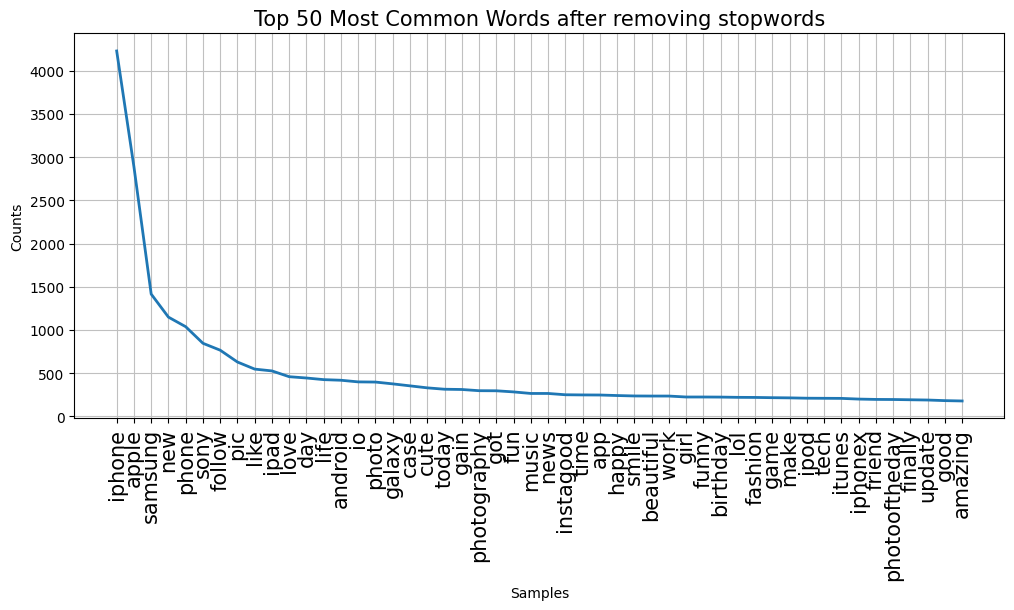

In [66]:
import matplotlib.pyplot as plt
# Frequency distribution of the words in tweets cleaned
freq_dist = nltk.FreqDist(vocab_raw1)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words after removing stopwords", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50,cumulative=False)
plt.show()

In [67]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'samsung': 1416, 'new': 1149, 'phone': 1038, 'sony': 846, 'follow': 766, 'pic': 629, 'like': 547, 'ipad': 526, ...})

# Creating wordcloud for better visualization (text data)

In [68]:
!pip install wordcloud

In [69]:
from wordcloud import WordCloud

In [70]:
text = """
The latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in the prices of pulses and cereals remained slow, with year-on-year price gains in the former still in the double digits for a 15th straight month at 13.6%, while the latter logged an inflation reading of 7.3%. Disconcertingly, food inflation in the rural areas rebounded to exceed 6%, and this at a time when stuttering private consumption is trying to regain momentum in the economically crucial agrarian hinterland. As an external member of the Monetary Policy Committee Shashanka Bhide noted in his comments at the RBI’s policy review meeting last month, “high food inflation would therefore hit growth adversely as it affects consumption”.

A durable disinflation to the RBI’s medium-term monetary policy goal of 4% headline retail inflation also faces other challenges, a key element being a resurgence in core inflation. The price gains measure, which strips out the more volatile food and fuel components, inched up to 3.38% after having snapped a 17-month decelerating streak in July. Based on responses from goods manufacturers polled for the monthly HSBC India Manufacturing PMI survey, HSBC observed this month that there was a “marked increase in prices charged for goods in August” with the rate of output-charge inflation the second-fastest in close to 11 years. Add to this the spatial and temporal volatility of the monsoon, and the outlook for price stability becomes even more muddied. RBI Governor Shaktikanta Das on Friday said that the last mile of disinflation was proving to be “challenging”. With policymakers still having to traverse a fair distance to ensure inflation does not undermine broader economic momentum, he reassuringly acknowledged that authorities “cannot afford to look the other way”.



"""
text

'\nThe latest retail inflation data from the National Statistical Office yet again highlights the challenge in achieving durable price stability. Provisional estimates for year-on-year price gains in August show the headline rate based on the Consumer Price Index (CPI) quickened marginally to 3.65%, from July’s 3.60%, as a sharp rebound in vegetable inflation led to a wider acceleration in overall food price gains. Price gains in vegetables — the third-largest constituent of the Consumer Food Price Index — surged by more than 380 basis points last month to 10.7%, spurring food price inflation to 5.66%. Among vegetables, year-on-year inflation in the most widely consumed potato and onion still remained in the high double digits for a sixth and 13th month at 64% and 54%, respectively, a moderation from July’s levels notwithstanding. Other vegetables including carrot, palak and brinjal experienced a surge in price gains with all three posting double-digit inflation. Also, disinflation in 

In [71]:
wordcloud=WordCloud(stopwords=combined_stopwords)
wordcloud.generate(text)

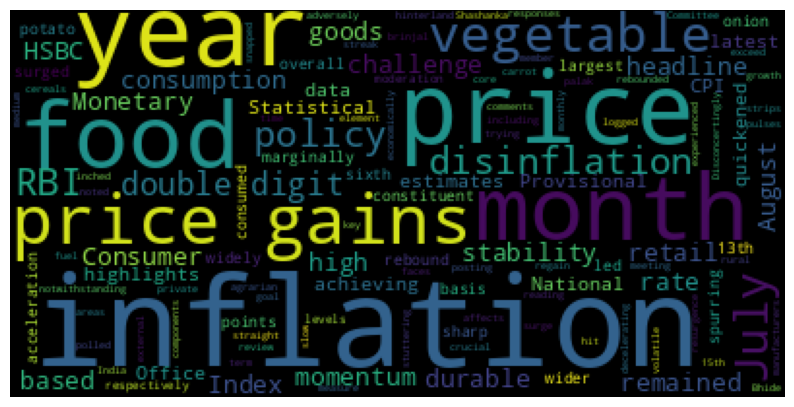

In [72]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

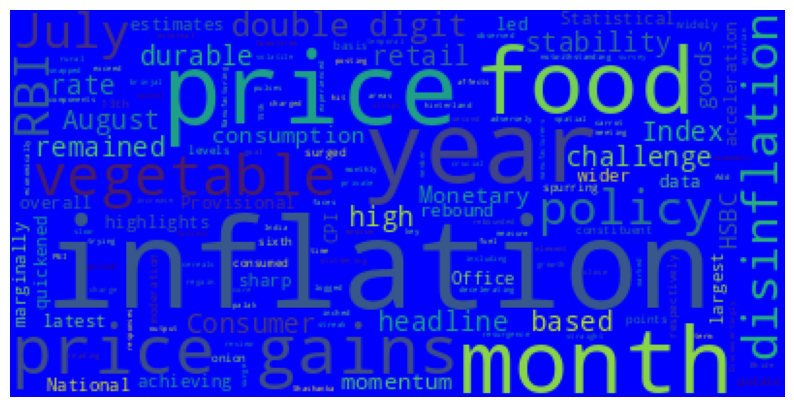

In [73]:
wordcloud = WordCloud(stopwords = combined_stopwords, background_color='blue', \
                     contour_width=3, contour_color='steelblue')
wordcloud.generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [74]:
#Saving the cleaned dataset for futher text/sentiments analysis
tweets.to_pickle('cleanaed_tweets_v1.pkl')

# Sentiment-Analaysis-using-bow_tf_idf

In [73]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',200)

In [74]:
tweets=pd.read_pickle('/content/drive/MyDrive/Twitter_Sentiments_Analysis_Using_LLM/Dataset/cleanaed_tweets_v1.pkl')
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [75]:
tweets.shape

(7920, 4)

In [76]:
positive_tweets=tweets[tweets.label==1]
positive_tweets.tail()

label  \
7915      1   
7916      1   
7917      1   
7918      1   
7919      1   

                                                                                                                                       tweet  \
7915                             Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/   
7916  We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…   
7917       Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!   
7918   Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/   
7919       Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/   

                                                                                                   cleaned_tweets  \
7915                                              live out loud lol liveoutloud selfie smile sony music headphone   
7916         would like wish you amazing day make every minute count tl today iphone accessory news life february   
7917  helping lovely year old neighbor with her ipad this morning ha just made realise that not actually need pad   
7918                         finally got smart pocket wifi stay connected anytimeanywhere ipad and samsung gadget   
7919                             apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew   

                                                          cleaned_tweets_without_stopwords  
7915                           live loud lol liveoutloud selfie smile sony music headphone  
7916  like wish amazing day make minute count tl today iphone accessory news life february  
7917               helping lovely year old neighbor ipad morning realise actually need pad  
7918              finally got smart pocket wifi stay connected anytime ipad samsung gadget  
7919      apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew

In [77]:
neg_tweets=tweets[tweets.label==0]
neg_tweets.head()

label  \
4       0   
5       0   
10      0   
11      0   
12      0   

                                                                                                                           tweet  \
4   What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   
5                                                              iPhone software update fucked up my phone big time Stupid iPhones   
10  hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.   
11    Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade   
12          Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo   

                                                                                                cleaned_tweets  \
4   what amazing service apple will not even talk about question have unless pay them for their stupid support   
5                                                  iphone software update fucked phone big time stupid iphones   
10    hey apple when you make new ipod not make new color inch thinner make not crash every five fuckin minite   
11            not heavy machinery but doe what need really dropped the ball with that design drinkyourhaterade   
12      contemplating giving the iphone bandwagon simply because cellcom ha new android depressing idontwantto   

                                                           cleaned_tweets_without_stopwords  
4                             amazing service apple talk question unless pay stupid support  
5                               iphone software update fucked phone big time stupid iphones  
10             hey apple make new ipod make new color inch thinner make crash fuckin minite  
11                        heavy machinery need really dropped ball design drinkyourhaterade  
12  contemplating giving iphone bandwagon simply cellcom new android depressing idontwantto

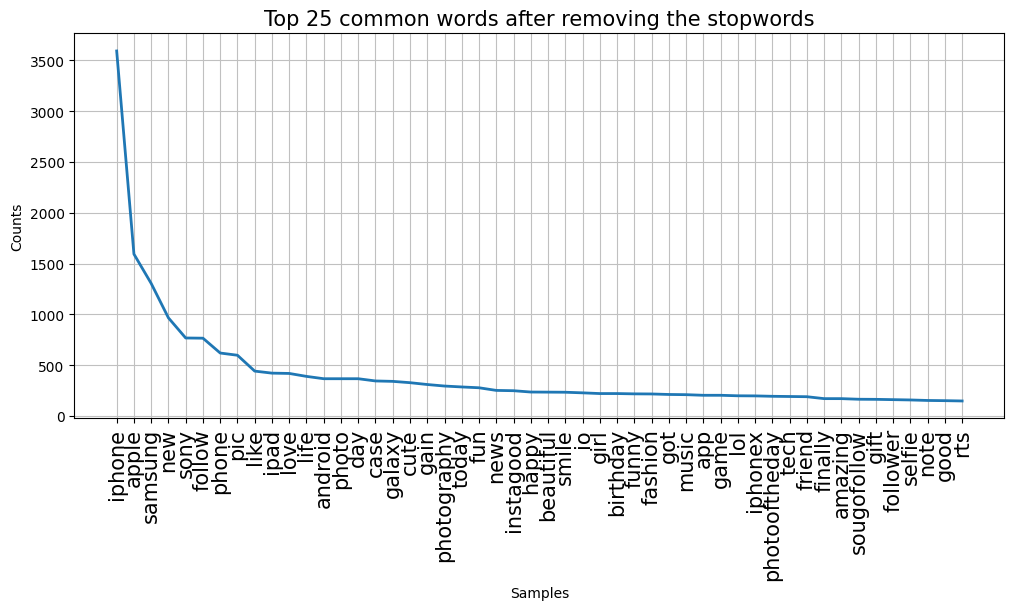

In [78]:
positive_vocab=[token for tweet in positive_tweets.cleaned_tweets_without_stopwords for token in tweet.split()]
positive_freq= nltk.FreqDist(positive_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 common words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
positive_freq.plot(50,cumulative=False)
plt.show()

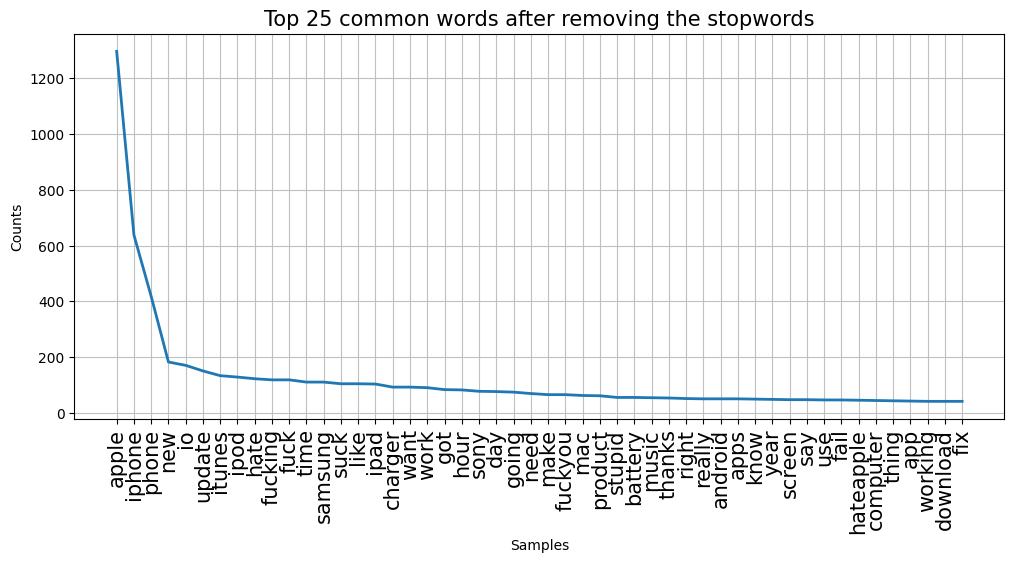

In [79]:
neg_vocab=[token for tweet in neg_tweets.cleaned_tweets_without_stopwords for token in tweet.split()]
neg_freq= nltk.FreqDist(neg_vocab)
plt.figure(figsize=(12,5))
plt.title("Top 25 common words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
neg_freq.plot(50,cumulative=False)
plt.show()


In [80]:
positive_freq

FreqDist({'iphone': 3593, 'apple': 1594, 'samsung': 1305, 'new': 966, 'sony': 768, 'follow': 766, 'phone': 620, 'pic': 598, 'like': 442, 'ipad': 422, ...})

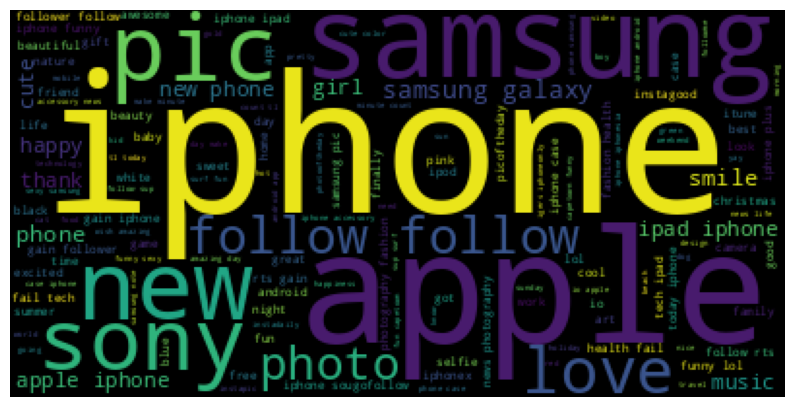

In [81]:
p_vocab=' '.join(map(str,positive_vocab))
pos_wordcloud=WordCloud()
pos_wordcloud.generate(p_vocab)
plt.figure(figsize=(10,8))
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()

In [82]:
neg_vocab

['amazing',
 'service',
 'apple',
 'talk',
 'question',
 'unless',
 'pay',
 'stupid',
 'support',
 'iphone',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'stupid',
 'iphones',
 'hey',
 'apple',
 'make',
 'new',
 'ipod',
 'make',
 'new',
 'color',
 'inch',
 'thinner',
 'make',
 'crash',
 'fuckin',
 'minite',
 'heavy',
 'machinery',
 'need',
 'really',
 'dropped',
 'ball',
 'design',
 'drinkyourhaterade',
 'contemplating',
 'giving',
 'iphone',
 'bandwagon',
 'simply',
 'cellcom',
 'new',
 'android',
 'depressing',
 'idontwantto',
 'louise',
 'battery',
 'painful',
 'charge',
 'overnight',
 'lunchtime',
 'battery',
 'dead',
 'hateorange',
 'reason',
 'iphone',
 'suck',
 'apple',
 'truth',
 'truthbetold',
 'agree',
 'fact',
 'realitycheck',
 'blackberrypic',
 'zpggd',
 'cazn',
 'apple',
 'store',
 'gunna',
 'screen',
 'monday',
 'fucking',
 'apple',
 'store',
 'fuckingpissed',
 'new',
 'ipod',
 'day',
 'button',
 'broke',
 'accidentally',
 'hit',
 'iphone',
 'screen',
 '

#Features Extration - Bag of Words Model

In [83]:
# bow , tf-idf , ngram - basic language model
# word2vec, glove, fasttext - distributed language model
# transformer, bert, gpt - Laarge language model (context model)

In [84]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [85]:
x= tweets['cleaned_tweets']
y= tweets['label']

In [86]:
#splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
cv_train=cv.fit_transform(x_train)
cv_test=cv.transform(x_test)

In [88]:
cv_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 78028 stored elements and shape (6336, 13722)>

In [89]:
cv_train[0].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [90]:
cv.get_feature_names_out()

array(['aag', 'aah', 'aalborg', ..., 'zwcn', 'zxw', 'zxzh'], dtype=object)

In [91]:
df=pd.DataFrame(cv_train.todense(),columns=cv.get_feature_names_out())
df.head()

aag  aah  aalborg  aapl  aare  aarhus  aaron  aarp  aarrrggghhhh  \
0    0    0        0     0     0       0      0     0             0   
1    0    0        0     0     0       0      0     0             0   
2    0    0        0     0     0       0      0     0             0   
3    0    0        0     0     0       0      0     0             0   
4    0    0        0     0     0       0      0     0             0   

   aashamsakal  ...  zpictwittercomsschughesb  zth  zumies  zune  zunehd  \
0            0  ...                         0    0       0     0       0   
1            0  ...                         0    0       0     0       0   
2            0  ...                         0    0       0     0       0   
3            0  ...                         0    0       0     0       0   
4            0  ...                         0    0       0     0       0   

   zunjndm  zurich  zwcn  zxw  zxzh  
0        0       0     0    0     0  
1        0       0     0    0     0  
2        0       0     0    0     0  
3        0       0     0    0     0  
4        0       0     0    0     0  

[5 rows x 13722 columns]

In [92]:
df.shape

(6336, 13722)

#Actual Machine Learning Model - Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
LR=LogisticRegression()
LR.fit(cv_train,y_train)

LogisticRegression()

In [94]:
LR.predict(cv_train)[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [95]:
LR.score(cv_test,y_test)

0.8661616161616161

#TF-IDF Logistic Model

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF=TfidfVectorizer()
TFIDF_train=TFIDF.fit_transform(x_train)
TFIDF_test=TFIDF.transform(x_test)

In [97]:
LR.fit(TFIDF_train,y_train)

LogisticRegression()

In [98]:
LR.score(TFIDF_test,y_test)

0.8686868686868687

#Model Building taking account of the class imbalance - reguralization methord

In [99]:
LR= LogisticRegression(class_weight='balanced', penalty='l2')
LR.fit(TFIDF_train,y_train)

print("Train Score: ", LR.score(TFIDF_train,y_train))
print()
print("Test Score: ", LR.score(TFIDF_test,y_test))

Train Score:  0.9266098484848485

Test Score:  0.8775252525252525


In [100]:
LR= LogisticRegression(class_weight='balanced', penalty='l2', C=2)
LR.fit(TFIDF_train,y_train)

print("Train Score: ", LR.score(TFIDF_train,y_train))
print()
print("Test Score: ", LR.score(TFIDF_test,y_test))

Train Score:  0.943655303030303

Test Score:  0.8781565656565656


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model (no need to fix C yet)
LR = LogisticRegression(class_weight='balanced')

# Define hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 2, 5, 10], 'penalty': ['l2']}

# Wrap the model in GridSearchCV
grid = GridSearchCV(LR, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit the grid
grid.fit(TFIDF_train, y_train)

# Best model after searching
best_model = grid.best_estimator_
print(grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 10, 'penalty': 'l2'}


In [102]:
LR= LogisticRegression(class_weight='balanced', penalty='l2', C=5)
LR.fit(TFIDF_train,y_train)

print("Train Score: ", LR.score(TFIDF_train,y_train))
print()
print("Test Score: ", LR.score(TFIDF_test,y_test))

Train Score:  0.9635416666666666

Test Score:  0.8768939393939394


In [103]:
LR= LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1', C=5)
LR.fit(TFIDF_train,y_train)

print("Train Score: ", LR.score(TFIDF_train,y_train))
print()
print("Test Score: ", LR.score(TFIDF_test,y_test))

Train Score:  0.9660669191919192

Test Score:  0.8667929292929293


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Use a solver that supports 'l1'
LR = LogisticRegression(solver='saga', penalty='l1', class_weight='balanced', max_iter=100)

# Grid of 'C' values to try
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50, 100]}

# GridSearchCV to find best C
grid = GridSearchCV(estimator=LR, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(TFIDF_train, y_train)

# Best model
print("Best parameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
print("Test set accuracy:", best_model.score(TFIDF_test, y_test))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'C': 5}
Best cross-validated F1 score: 0.9246789746227717
Test set accuracy: 0.8699494949494949


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#Word 2 vec embeddings

In [1]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',200)

In [2]:
df=pd.read_pickle('/content/cleanaed_tweets_v1.pkl')
df.head()

label  \
0      0   
1      0   
2      0   
3      0   
4      1   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [3]:
df.shape

(7920, 4)

In [4]:
df.columns

Index(['label', 'tweet', 'cleaned_tweets', 'cleaned_tweets_without_stopwords'], dtype='object')

In [5]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [6]:
#splitting the data into x and y
x= df[['cleaned_tweets_without_stopwords']]
y= df['label']

print(y.head())
print()
print(x.head())

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

                                                                  cleaned_tweets_without_stopwords
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2                               love talk makememories unplug relax iphone smartphone wifi connect
3                                                  wired know george way iphone cute daventry home
4                                    amazing service apple talk question unless pay stupid support


In [7]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6336, 1) (1584, 1) (6336,) (1584,)


In [8]:
# importing basic nlp cleaning method prior applying word2vec
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean(doc):
  regex = "[^a-zA-Z]"
  doc = re.sub(regex, " ", doc)
  doc = doc.lower()
  tokens = nltk.word_tokenize(doc)
  stop_words= list(set(stopwords.words('english')))
  custon_stop_words= ["i", "a", "h","iO","i0","1o","10","lo","l0","io ", "i0 "]
  stop_words= stop_words + custom_stop_words
  filterted_tokens=[word for word in tokens if word not in stope_words]
  lemmatized_token= [lemmatizer.lemmatize(token) for token in filterted_tokens]
  return " ".join(lemmatized_token)

In [9]:
x_train.head()

cleaned_tweets_without_stopwords
7568                                                                                                                                        chocolate cake courtesy miss fara manager samsung office birthday
1718                                                                                                                                      received new iphone thank iphone apple io appleiphone phone iphonex
1365  view travel traveldiaries travelphotography travelgram travelling travelphoto travelworld world vacation break work lifestyle change worklifebalance product designer remote job saas remotework app...
1077                                                                                                                                                                 change icloud email log surely connected
3045                                                                                                                                     today greensmoothie apple grapefruit banana green smoothie komatsuna

In [10]:
x_test.head()

cleaned_tweets_without_stopwords
906                                                    iphone suck keep screwing shut freeze jazz
3556  flower art flower art colour photography creative beautiful line samsung tuesday pic uwxqnq
2043                                        got copy killzone shadow fall year plus sony killzone
1264                   coffee love iphoneography iphonesia photooftheday iphone instagood popular
5337                                       sure iphone deleted text message history contact apple

In [11]:
x_train['tokenised_sentences']=x_train['cleaned_tweets_without_stopwords'].apply(lambda doc: doc.split())
x_train

cleaned_tweets_without_stopwords  \
7568                                                                                                                                        chocolate cake courtesy miss fara manager samsung office birthday   
1718                                                                                                                                      received new iphone thank iphone apple io appleiphone phone iphonex   
1365  view travel traveldiaries travelphotography travelgram travelling travelphoto travelworld world vacation break work lifestyle change worklifebalance product designer remote job saas remotework app...   
1077                                                                                                                                                                 change icloud email log surely connected   
3045                                                                                                                                     today greensmoothie apple grapefruit banana green smoothie komatsuna   
...                                                                                                                                                                                                       ...   
2251                                                                                                                                                             love wait apple hour phone fixed hateiphones   
5281                                                                                                                                       love computer freeze clear content ipod like needed hatetechnology   
2845                                                                                drandrew live ask download shoppinglist app iphone purchase download book relationship dating datingadvice lslpic epbexrz   
7919                                                                                                                         apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew   
4117                                                                                                                                                      fuck iphone die eat hateyou dek desk gfy dontknowme   

                                                                                                                                                                                          tokenised_sentences  
7568                                                                                                                              [chocolate, cake, courtesy, miss, fara, manager, samsung, office, birthday]  
1718                                                                                                                           [received, new, iphone, thank, iphone, apple, io, appleiphone, phone, iphonex]  
1365  [view, travel, traveldiaries, travelphotography, travelgram, travelling, travelphoto, travelworld, world, vacation, break, work, lifestyle, change, worklifebalance, product, designer, remote, job,...  
1077                                                                                                                                                          [change, icloud, email, log, surely, connected]  
3045                                                                                                                            [today, greensmoothie, apple, grapefruit, banana, green, smoothie, komatsuna]  
...                                                                                                                                                                                                       ...  
2251                                                                                                                                                     [love, wait, apple, hour, phone, fixed, hateiphones]  


In [12]:
x_test['tokenised_sentences']= x_test['cleaned_tweets_without_stopwords'].apply(lambda doc: doc.split())
x_test

cleaned_tweets_without_stopwords  \
906                                                      iphone suck keep screwing shut freeze jazz   
3556    flower art flower art colour photography creative beautiful line samsung tuesday pic uwxqnq   
2043                                          got copy killzone shadow fall year plus sony killzone   
1264                     coffee love iphoneography iphonesia photooftheday iphone instagood popular   
5337                                         sure iphone deleted text message history contact apple   
...                                                                                             ...   
7321                                        thank gift awesome amazing gift apple orange watermelon   
3681  hacker wifi password android apps unitedstate cute color igers iphoneonly guitarplayer iphone   
6867                        mind think buddha sony travel bangkok shaileshphotographypic rugpdxfpzk   
5313                  purchase michaelkors phone case iphone apple yellow bright thursday newcastle   
6902                                                                 iphones look way make need new   

                                                                                             tokenised_sentences  
906                                                           [iphone, suck, keep, screwing, shut, freeze, jazz]  
3556   [flower, art, flower, art, colour, photography, creative, beautiful, line, samsung, tuesday, pic, uwxqnq]  
2043                                             [got, copy, killzone, shadow, fall, year, plus, sony, killzone]  
1264                         [coffee, love, iphoneography, iphonesia, photooftheday, iphone, instagood, popular]  
5337                                             [sure, iphone, deleted, text, message, history, contact, apple]  
...                                                                                                          ...  
7321                                            [thank, gift, awesome, amazing, gift, apple, orange, watermelon]  
3681  [hacker, wifi, password, android, apps, unitedstate, cute, color, igers, iphoneonly, guitarplayer, iphone]  
6867                            [mind, think, buddha, sony, travel, bangkok, shaileshphotographypic, rugpdxfpzk]  
5313                    [purchase, michaelkors, phone, case, iphone, apple, yellow, bright, thursday, newcastle]  
6902                                                                       [iphones, look, way, make, need, new]  

[1584 rows x 2 columns]

#Applying Feature Transformation approach - Word2vec

In [13]:
"""
## Capture the semantic relationship between words
## Embedding - dense vector (50-300 dimensions)

### Word2Vec Architecture

a) CBOW - Continous Bag of Words
b) Skip-Gram

1) input layer
2) hidden layer
3) output layer

4) Word Embedding
5) C0ontext Window
6) Negative Sampling Methord
7) Hierarchical softmax method
8) Cosine Similarity

### Significance of Word2Vec
a) Semantic Similarity
b) Efficient Learning
c) Transfer Learning
"""

'\n## Capture the semantic relationship between words \n## Embedding - dense vector (50-300 dimensions)\n\n### Word2Vec Architecture \n\na) CBOW - Continous Bag of Words \nb) Skip-Gram\n\n1) input layer\n2) hidden layer\n3) output layer\n\n4) Word Embedding\n5) C0ontext Window\n6) Negative Sampling Methord\n7) Hierarchical softmax method\n8) Cosine Similarity\n\n### Significance of Word2Vec\na) Semantic Similarity\nb) Efficient Learning\nc) Transfer Learning\n'

In [87]:
from gensim.models import Word2Vec

In [ ]:
# STEP 1: Clean uninstall of conflicting or corrupted packages
!pip uninstall -y numpy pandas gensim scikit-learn scipy

# STEP 2: Install known compatible versions of all critical packages
!pip install numpy==1.24.4 pandas==1.5.3 gensim==4.3.2 scikit-learn==1.2.2 scipy==1.10.1 --no-cache-dir

# STEP 3: Restart the runtime so changes take full effect
import os
os.kill(os.getpid(), 9)


In [88]:
%time word_vec = Word2Vec(x_train['tokenised_sentences'], vector_size=300,min_count=1)
print(word_vec)

CPU times: user 1.68 s, sys: 49.5 ms, total: 1.73 s
Wall time: 1.07 s
Word2Vec<vocab=13128, vector_size=300, alpha=0.025>


In [89]:
13262*300

3978600

In [90]:
x_train.shape

(6336, 2)

In [91]:
word_vec.corpus_count

6336

In [92]:
word_vec.vector_size

300

In [93]:
word_vec.wv.index_to_key

['iphone',
 'apple',
 'samsung',
 'new',
 'phone',
 'sony',
 'follow',
 'pic',
 'ipad',
 'like',
 'love',
 'day',
 'life',
 'android',
 'io',
 'photo',
 'galaxy',
 'case',
 'cute',
 'today',
 'gain',
 'photography',
 'got',
 'fun',
 'news',
 'time',
 'app',
 'music',
 'instagood',
 'happy',
 'birthday',
 'work',
 'smile',
 'girl',
 'funny',
 'game',
 'lol',
 'fashion',
 'beautiful',
 'ipod',
 'itunes',
 'make',
 'tech',
 'iphonex',
 'friend',
 'photooftheday',
 'update',
 'finally',
 'good',
 'apps',
 'note',
 'mac',
 'want',
 'follower',
 'sougofollow',
 'thanks',
 'amazing',
 'gift',
 'sale',
 'selfie',
 'fail',
 'fuck',
 'rts',
 'igers',
 'home',
 'baby',
 'cool',
 'iphonesia',
 'free',
 'look',
 'family',
 'camera',
 'year',
 'best',
 'hate',
 'going',
 'art',
 'suck',
 'iphoneonly',
 'charger',
 'smartphone',
 'christmas',
 'health',
 'color',
 'need',
 'white',
 'thing',
 'live',
 'picoftheday',
 'fucking',
 'screen',
 'money',
 'mobile',
 'know',
 'product',
 'laptop',
 'summer'

In [94]:
def get_document_vector(doc,model):
  tokens =[word for word in doc if word in model]
  if tokens:
    doc_embedding=np.mean(model[tokens],axis=0)
  else:
    doc_embedding=np.zeros(model.vector_size)
  return doc_embedding

In [95]:
x_train['w2v_doc_embedding'] = x_train['tokenised_sentences'].apply(lambda doc: get_document_vector(doc,word_vec.wv))

In [96]:
x_train.head()

cleaned_tweets_without_stopwords  \
7568                                                                                                                                        chocolate cake courtesy miss fara manager samsung office birthday   
1718                                                                                                                                      received new iphone thank iphone apple io appleiphone phone iphonex   
1365  view travel traveldiaries travelphotography travelgram travelling travelphoto travelworld world vacation break work lifestyle change worklifebalance product designer remote job saas remotework app...   
1077                                                                                                                                                                 change icloud email log surely connected   
3045                                                                                                                                     today greensmoothie apple grapefruit banana green smoothie komatsuna   

                                                                                                                                                                                          tokenised_sentences  \
7568                                                                                                                              [chocolate, cake, courtesy, miss, fara, manager, samsung, office, birthday]   
1718                                                                                                                           [received, new, iphone, thank, iphone, apple, io, appleiphone, phone, iphonex]   
1365  [view, travel, traveldiaries, travelphotography, travelgram, travelling, travelphoto, travelworld, world, vacation, break, work, lifestyle, change, worklifebalance, product, designer, remote, job,...   
1077                                                                                                                                                          [change, icloud, email, log, surely, connected]   
3045                                                                                                                            [today, greensmoothie, apple, grapefruit, banana, green, smoothie, komatsuna]   

                                                                                                                                                                                            w2v_doc_embedding  
7568  [-0.04606607, 0.23589379, -0.029055843, 0.0836217, -0.0013278523, -0.1373683, 0.15541773, 0.27896446, 0.03990026, -0.1049286, 0.06370462, -0.110235214, -0.039539587, -0.031905014, -0.13509564, -0....  
1718  [-0.11055008, 0.54898477, -0.089844175, 0.24354747, 0.028854202, -0.39367372, 0.37607822, 0.8051815, 0.071590506, -0.26457244, 0.16823606, -0.31464714, -0.10517986, -0.016056575, -0.34771678, -0.3...  
1365  [-0.035318602, 0.1737158, -0.026164379, 0.0682869, 0.003182038, -0.1122488, 0.115695335, 0.22970122, 0.02714362, -0.08017788, 0.049439922, -0.08727806, -0.029603295, -0.01624425, -0.104534835, -0....  
1077  [-0.018539174, 0.08778197, -0.0118563725, 0.03333943, 0.0009193301, -0.055666268, 0.059120897, 0.111474715, 0.014453609, -0.04008766, 0.024368936, -0.04183763, -0.015026994, -0.008500813, -0.05256...  
3045  [-0.053858403, 0.25965863, -0.0386196, 0.1017141, 0.0059733596, -0.16676155, 0.17133592, 0.3400108, 0.040818915, -0.119600035, 0.076296344, -0.13454066, -0.04421442, -0.025639033, -0.15265194, -0....

In [97]:
x_test['w2v_doc_embedding'] = x_test['tokenised_sentences'].apply(lambda doc: get_document_vector(doc,word_vec.wv))

In [98]:
x_test.head()

cleaned_tweets_without_stopwords  \
906                                                    iphone suck keep screwing shut freeze jazz   
3556  flower art flower art colour photography creative beautiful line samsung tuesday pic uwxqnq   
2043                                        got copy killzone shadow fall year plus sony killzone   
1264                   coffee love iphoneography iphonesia photooftheday iphone instagood popular   
5337                                       sure iphone deleted text message history contact apple   

                                                                                            tokenised_sentences  \
906                                                          [iphone, suck, keep, screwing, shut, freeze, jazz]   
3556  [flower, art, flower, art, colour, photography, creative, beautiful, line, samsung, tuesday, pic, uwxqnq]   
2043                                            [got, copy, killzone, shadow, fall, year, plus, sony, killzone]   
1264                        [coffee, love, iphoneography, iphonesia, photooftheday, iphone, instagood, popular]   
5337                                            [sure, iphone, deleted, text, message, history, contact, apple]   

                                                                                                                                                                                            w2v_doc_embedding  
906   [-0.04339322, 0.21395116, -0.04191354, 0.11093217, 0.020840207, -0.17699294, 0.15091816, 0.36584333, 0.017319845, -0.10993897, 0.072205834, -0.1446923, -0.047053855, 0.015696833, -0.14739998, -0.1...  
3556  [-0.086480595, 0.42671058, -0.0691599, 0.1658064, 0.012783647, -0.27950633, 0.28282243, 0.5643487, 0.060476948, -0.20390676, 0.115927465, -0.20579647, -0.07958731, -0.030314414, -0.26270232, -0.22...  
2043  [-0.053908825, 0.26724568, -0.03795926, 0.10646736, 0.0051856646, -0.1733555, 0.17617545, 0.3534717, 0.042195134, -0.12422922, 0.07585651, -0.13692439, -0.04442436, -0.024179779, -0.16046791, -0.1...  
1264  [-0.07639435, 0.37877816, -0.06285748, 0.19528362, 0.03680363, -0.30565777, 0.2630628, 0.6261056, 0.029790534, -0.18888088, 0.11600614, -0.24950784, -0.07560843, 0.012076402, -0.24937281, -0.23548...  
5337  [-0.06598341, 0.32536274, -0.055426154, 0.1501025, 0.020326782, -0.23988324, 0.22289944, 0.49343634, 0.039363805, -0.1570897, 0.10235889, -0.19354892, -0.062250525, -0.003712955, -0.209945, -0.189...

# Random Forest Algorithm

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
%time rf.fit(list(x_train['w2v_doc_embedding']), y_train)
y_pred = rf.predict(list(x_test['w2v_doc_embedding']))
print(y_pred)

from sklearn import metrics

print(f'Model Accuracy : {metrics.accuracy_score(y_test, y_pred)} ')
print()
print(f"Model's Classification Performance : {metrics.classification_report(y_test, y_pred)}")

CPU times: user 10.6 s, sys: 25 ms, total: 10.6 s
Wall time: 10.8 s
[0 0 0 ... 0 0 1]
Model Accuracy : 0.8118686868686869 

Model's Classification Performance :               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1179
           1       0.71      0.44      0.55       405

    accuracy                           0.81      1584
   macro avg       0.77      0.69      0.71      1584
weighted avg       0.80      0.81      0.80      1584



# Deep LearningMethord

In [2]:
import os
import numpy as np
import pandas as pd


In [3]:
df= pd.read_pickle("/content/drive/MyDrive/Twitter_Sentiments_Analysis_Using_LLM/Dataset/cleanaed_tweets_v1.pkl")
df.head()

label                                              tweet  \
0      1  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1      1  Finally a transparant silicon case ^^ Thanks t...   
2      1  We love this! Would you go? #talk #makememorie...   
3      1  I'm wired I know I'm George I was made that wa...   
4      0  What amazing service! Apple won't even talk to...   

                                      cleaned_tweets  \
0  fingerprint pregnancy test android apps beauti...   
1  finally transparant silicon case thanks uncle ...   
2  love this would you talk makememories unplug r...   
3  wired know george wa made that way iphone cute...   
4  what amazing service apple will not even talk ...   

                    cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beauti...  
1  finally transparant silicon case thanks uncle ...  
2  love talk makememories unplug relax iphone sma...  
3    wired know george way iphone cute daventry home  
4  amazing service apple talk question unless pay...

In [4]:
# Split the data into independent and dependent features
x= df.drop('label', axis=1)
y=df['label']

In [5]:
x

tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1...   
1     Finally a transparant silicon case ^^ Thanks t...   
2     We love this! Would you go? #talk #makememorie...   
3     I'm wired I know I'm George I was made that wa...   
4     What amazing service! Apple won't even talk to...   
...                                                 ...   
7915  Live out loud #lol #liveoutloud #selfie #smile...   
7916  We would like to wish you an amazing day! Make...   
7917  Helping my lovely 90 year old neighbor with he...   
7918  Finally got my #smart #pocket #wifi stay conne...   
7919  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...   

                                         cleaned_tweets  \
0     fingerprint pregnancy test android apps beauti...   
1     finally transparant silicon case thanks uncle ...   
2     love this would you talk makememories unplug r...   
3     wired know george wa made that way iphone cute...   
4     what amazing service apple will not even talk ...   
...                                                 ...   
7915  live out loud lol liveoutloud selfie smile son...   
7916  would like wish you amazing day make every min...   
7917  helping lovely year old neighbor with her ipad...   
7918  finally got smart pocket wifi stay connected a...   
7919  apple barcelona apple store bcn barcelona trav...   

                       cleaned_tweets_without_stopwords  
0     fingerprint pregnancy test android apps beauti...  
1     finally transparant silicon case thanks uncle ...  
2     love talk makememories unplug relax iphone sma...  
3       wired know george way iphone cute daventry home  
4     amazing service apple talk question unless pay...  
...                                                 ...  
7915  live loud lol liveoutloud selfie smile sony mu...  
7916  like wish amazing day make minute count tl tod...  
7917  helping lovely year old neighbor ipad morning ...  
7918  finally got smart pocket wifi stay connected a...  
7919  apple barcelona apple store bcn barcelona trav...  

[7920 rows x 3 columns]

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import one_hot

In [7]:
#vocab size
voc_size = 1000

In [8]:
df.columns

Index(['label', 'tweet', 'cleaned_tweets', 'cleaned_tweets_without_stopwords'], dtype='object')

In [9]:
df['cleaned_tweets_without_stopwords'][0]

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [10]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
len(x)

7920

In [12]:
#Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]

In [13]:
for i in range(0, len(x)):
  print(i)
  review = re.sub('[^a-zA-Z]',' ',x['cleaned_tweets_without_stopwords'][i])
  review = review.lower()
  review = review.split()
  review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109

In [14]:
corpus

['fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon',
 'final transpar silicon case thank uncl yay soni xperia sonyexperia',
 'love talk makememori unplug relax iphon smartphon wifi connect',
 'wire know georg way iphon cute daventri home',
 'amaz servic appl talk question unless pay stupid support',
 'iphon softwar updat fuck phone big time stupid iphon',
 'happi instap instadaili soni xperia xperiaz',
 'new type charger cabl bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pic pjiwq wtc',
 'bout shop listen music iphon justm music likeforlik followforfollow',
 'photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor',
 'hey appl make new ipod make new color inch thinner make crash fuckin minit',
 'heavi machineri need realli drop ball design drinkyourhaterad',
 'contempl give iphon bandwagon simpli cellcom new android depress idontwantto',
 'c

In [15]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[595, 86, 610, 341, 665, 643, 718, 761, 674, 995, 272, 762],
 [230, 515, 848, 459, 390, 311, 478, 319, 948, 646],
 [210, 563, 386, 153, 211, 762, 143, 541, 995],
 [906, 23, 38, 631, 762, 718, 607, 302],
 [44, 813, 505, 563, 875, 898, 714, 255, 650],
 [762, 451, 744, 886, 314, 837, 698, 255, 762],
 [226, 767, 526, 319, 948, 345],
 [36,
  447,
  854,
  942,
  843,
  868,
  409,
  36,
  492,
  467,
  942,
  473,
  231,
  153,
  839,
  331,
  220,
  315,
  545,
  42,
  915,
  916,
  702,
  881,
  735,
  658],
 [194, 342, 55, 147, 762, 404, 147, 562, 91],
 [57, 581, 504, 898, 315, 319, 280, 458, 731, 203, 156, 718, 122],
 [990, 505, 268, 36, 879, 268, 36, 659, 768, 797, 268, 699, 490, 306],
 [48, 548, 630, 938, 3, 802, 678, 518],
 [82, 180, 762, 169, 499, 506, 36, 341, 496, 206],
 [462, 727, 505, 950, 468, 211, 581, 211, 505, 222, 505, 342],
 [323, 781, 620, 274, 583, 39, 781, 254, 348],
 [530, 526, 431, 380, 411, 319, 411, 558],
 [516, 821, 198, 314, 459, 762, 762, 881, 643, 718],
 [462, 

In [16]:
sent_length = 20
embedded_doc = pad_sequences(onehot_repr,padding='pre', maxlen=sent_length)
print(embedded_doc)

[[  0   0   0 ... 995 272 762]
 [  0   0   0 ... 319 948 646]
 [  0   0   0 ... 143 541 995]
 ...
 [  0   0   0 ... 386 630 833]
 [  0   0   0 ... 222 198  97]
 [  0   0   0 ... 148 581 593]]


In [17]:
len(embedded_doc)

7920

In [18]:
y.shape

(7920,)

In [19]:
y

0       1
1       1
2       1
3       1
4       0
       ..
7915    1
7916    1
7917    1
7918    1
7919    1
Name: label, Length: 7920, dtype: int64

In [20]:
embedded_doc[0]

array([  0,   0,   0,   0,   0,   0,   0,   0, 595,  86, 610, 341, 665,
       643, 718, 761, 674, 995, 272, 762], dtype=int32)

In [21]:
x_final = np.array(embedded_doc)
y_final = np.array(y)

In [22]:
x_final.shape, y_final.shape

((7920, 20), (7920,))

In [23]:
y_final.dtype

dtype('int64')

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

In [25]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

# Building LSTM Model for training and evaluating purpose

In [42]:
embedding_vector_features= 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=16)
print(model.summary())

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7872 - loss: 0.4603 - val_accuracy: 0.8491 - val_loss: 0.3331
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8868 - loss: 0.2590 - val_accuracy: 0.8491 - val_loss: 0.3339
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9071 - loss: 0.2303 - val_accuracy: 0.8390 - val_loss: 0.3477
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9055 - loss: 0.2169 - val_accuracy: 0.8497 - val_loss: 0.3709
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9324 - loss: 0.1811 - val_accuracy: 0.8434 - val_loss: 0.3678
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9309 - loss: 0.1753 - val_accuracy: 0.8352 - val_loss: 0.4983
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9436 - loss: 0.1394 - val_accuracy: 0.8283 - val_loss: 0.4560
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9483 - loss: 0.1333 - val_accu

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (16, 20, 40)           │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (16, 100)              │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (16, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (16, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,505 (1.10 MB)

 Trainable params: 96,501 (376.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 193,004 (753.93 KB)

None


In [32]:
embedding_vector_features= 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(GRU(100))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)
print(model.summary())

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7526 - loss: 0.5452 - val_accuracy: 0.8340 - val_loss: 0.3618
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8728 - loss: 0.2707 - val_accuracy: 0.8460 - val_loss: 0.3387
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8926 - loss: 0.2436 - val_accuracy: 0.8491 - val_loss: 0.3510
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9085 - loss: 0.2191 - val_accuracy: 0.8415 - val_loss: 0.3613
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9052 - loss: 0.2214 - val_accuracy: 0.8371 - val_loss: 0.3753
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9145 - loss: 0.2088 - val_accuracy: 0.8434 - val_loss: 0.3828
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9154 - loss: 0.2033 - val_accuracy: 0.8422 - val_loss: 0.4126
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9212 - loss: 0.2001 - val_accuracy: 0.8314 - val_loss: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (64, 20, 40)           │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (64, 100)              │        42,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (64, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,105 (969.16 KB)

 Trainable params: 82,701 (323.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,404 (646.11 KB)

None


In [33]:
embedding_vector_features= 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
print(model.summary())

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7451 - loss: 0.5461 - val_accuracy: 0.8466 - val_loss: 0.3416
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8845 - loss: 0.2749 - val_accuracy: 0.8504 - val_loss: 0.3209
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8974 - loss: 0.2430 - val_accuracy: 0.8409 - val_loss: 0.3414
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8999 - loss: 0.2325 - val_accuracy: 0.8460 - val_loss: 0.3830
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9151 - loss: 0.2140 - val_accuracy: 0.8479 - val_loss: 0.3953
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9125 - loss: 0.2203 - val_accuracy: 0.8447 - val_loss: 0.3702
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9246 - loss: 0.1954 - val_accuracy: 0.8428 - val_loss: 0.3856
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.9307 - loss: 0.1833 - val_accuracy: 0.8409 - val_loss: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (64, 20, 40)           │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (64, 200)              │       112,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (64, 200)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 1)                │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,005 (1.75 MB)

 Trainable params: 153,001 (597.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 306,004 (1.17 MB)

None


In [39]:
embedding_vector_features= 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
print(model.summary())

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7446 - loss: 0.5196 - val_accuracy: 0.7443 - val_loss: 0.5422
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8930 - loss: 0.2825 - val_accuracy: 0.7443 - val_loss: 0.5707
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9008 - loss: 0.2465 - val_accuracy: 0.7443 - val_loss: 0.6583
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9015 - loss: 0.2218 - val_accuracy: 0.7443 - val_loss: 0.6120
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9388 - loss: 0.1709 - val_accuracy: 0.7696 - val_loss: 0.4773
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9377 - loss: 0.1608 - val_accuracy: 0.8258 - val_loss: 0.4007
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9472 - loss: 0.1359 - val_accuracy: 0.8182 - val_loss: 0.4881
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9511 - loss: 0.1298 - val_accuracy: 0.8100 - 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (64, 20, 40)           │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (64, 100)              │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (64, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (64, 100)              │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (64, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,305 (1.11 MB)

 Trainable params: 96,701 (377.74 KB)

 Non-trainable params: 200 (800.00 B)

 Optimizer params: 193,404 (755.49 KB)

None


In [ ]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
# First LSTM Layer
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Second LSTM Layer
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Dense Layer(s)
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
model.summary()


# Transformer model - Contest Based Language Model or Large LAnguage Model

In [ ]:
!pip install transformers
!pip install datasets

In [26]:
from transformers import pipeline

In [27]:
from datasets import load_dataset

In [28]:
classification = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [29]:
x.columns

Index(['tweet', 'cleaned_tweets', 'cleaned_tweets_without_stopwords'], dtype='object')

In [30]:
x['cleaned_tweets_without_stopwords'][0]

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [31]:
df.columns

Index(['label', 'tweet', 'cleaned_tweets', 'cleaned_tweets_without_stopwords'], dtype='object')

In [32]:
x['cleaned_tweets_without_stopwords'][2500]

'secure study show malware pc come pdf exploit apple user'

In [33]:
classification(x['cleaned_tweets_without_stopwords'][2500])

[{'label': 'NEGATIVE', 'score': 0.9929689764976501}]

In [34]:
classification(x['cleaned_tweets_without_stopwords'][0])

[{'label': 'POSITIVE', 'score': 0.9834354519844055}]

In [35]:
review = """IN WHOLESOME ENTERTAINER,POORA PAISA VASOOL DHAMAKEDAR EXPERIENCE ,a perfect Horror comedy with all the elements right in place with horror comedy blend, Emotions, Fun , Great BGM , Excellent Cinematography, top notch VFX, Superb Production design and the powerful Maddock’s supernatural universe coming together giving chilling feels in the adrenaline pumping climax. Director Amar Kaushik yet again excels in brining out a unique and fun to watch horror comedy with the right balance leaving the audience completely entertained in the cinemas, the concept is well framed and presented, it was overwhelming feeling to see BHEDIYA,STREE and the the active cast in a single frame killing it . Climax was phenomenal To the next level. Rajkumar Rao hits the ball out of the park with his impeccable comic time and a strong performance throughout, Shraddha Kapoor delivered to the par excellence , whatta performance from her a silent avatar to the fierce avatar ,she just killed it gracefully and gorgeously. Great chemistry between the lead pair,Pankaj Tripati was Fun , Aparshakthi Khurana, Abhishek Banerjee entertains us throughout and all of them  in a combo brought out the best fun camaraderie making audience go gaga over . Anya Singh as chitti had a sweet and short role . This film teaches us how cameos need to be handled ,with Akshay Kumar in his zone delivering a Cameo to remember, followed by Varun Dhawan As Bhediya , Tammana as Shama
"""
review

'IN WHOLESOME ENTERTAINER,POORA PAISA VASOOL DHAMAKEDAR EXPERIENCE ,a perfect Horror comedy with all the elements right in place with horror comedy blend, Emotions, Fun , Great BGM , Excellent Cinematography, top notch VFX, Superb Production design and the powerful Maddock’s supernatural universe coming together giving chilling feels in the adrenaline pumping climax. Director Amar Kaushik yet again excels in brining out a unique and fun to watch horror comedy with the right balance leaving the audience completely entertained in the cinemas, the concept is well framed and presented, it was overwhelming feeling to see BHEDIYA,STREE and the the active cast in a single frame killing it . Climax was phenomenal To the next level. Rajkumar Rao hits the ball out of the park with his impeccable comic time and a strong performance throughout, Shraddha Kapoor delivered to the par excellence , whatta performance from her a silent avatar to the fierce avatar ,she just killed it gracefully and gorge

In [36]:
classification(review)

[{'label': 'POSITIVE', 'score': 0.9998418092727661}]

In [37]:
df.columns

Index(['label', 'tweet', 'cleaned_tweets', 'cleaned_tweets_without_stopwords'], dtype='object')

In [44]:
for i in range(20):
    result = classification(df['cleaned_tweets'][i])
    print(f"Tweet {i+1}: {result}")


Tweet 1: [{'label': 'POSITIVE', 'score': 0.9834354519844055}]
Tweet 2: [{'label': 'POSITIVE', 'score': 0.9970172643661499}]
Tweet 3: [{'label': 'POSITIVE', 'score': 0.9895538091659546}]
Tweet 4: [{'label': 'POSITIVE', 'score': 0.6204802989959717}]
Tweet 5: [{'label': 'POSITIVE', 'score': 0.980455219745636}]
Tweet 6: [{'label': 'NEGATIVE', 'score': 0.9994263648986816}]
Tweet 7: [{'label': 'POSITIVE', 'score': 0.9984725117683411}]
Tweet 8: [{'label': 'NEGATIVE', 'score': 0.8726925849914551}]
Tweet 9: [{'label': 'NEGATIVE', 'score': 0.9653240442276001}]
Tweet 10: [{'label': 'POSITIVE', 'score': 0.9915850162506104}]
Tweet 11: [{'label': 'POSITIVE', 'score': 0.8840745687484741}]
Tweet 12: [{'label': 'NEGATIVE', 'score': 0.9955964684486389}]
Tweet 13: [{'label': 'NEGATIVE', 'score': 0.9996656179428101}]
Tweet 14: [{'label': 'NEGATIVE', 'score': 0.9774574041366577}]
Tweet 15: [{'label': 'NEGATIVE', 'score': 0.9988284707069397}]
Tweet 16: [{'label': 'POSITIVE', 'score': 0.9920152425765991}]
Tw